In [6]:

import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

# Define the URL
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/"
reviews = []

# Loop through the first few pages of reviews
for page in range(1, 6):  # Adjust the range for more pages
    url = f"{base_url}page/{page}/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # Find review containers
        review_blocks = soup.find_all('div', class_='body')
        for review in review_blocks:
            reviews.append(review.text.strip())
    else:
        print(f"Failed to access page {page}")

# Ensure the directory exists
os.makedirs("data", exist_ok=True)

# Save reviews to a DataFrame
df = pd.DataFrame(reviews, columns=["Review"])
df.to_csv("data/raw_reviews.csv", index=False)
print("Scraping completed. Data saved to 'data/raw_reviews.csv'.")


Scraping completed. Data saved to 'data/raw_reviews.csv'.


The error occurs because `null` is not a valid keyword in Python. In Python, the equivalent of `null` is `None`.

To fix this, replace `null` with `None` in your code.

Here is the corrected code:



In [7]:


{
    "execution_count": None,
    # ...existing code...
}

{'execution_count': None}

In [8]:
import re

# Load raw data
df = pd.read_csv("data/raw_reviews.csv")

# Clean reviews
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower()  # Convert to lowercase

df['Cleaned_Review'] = df['Review'].apply(clean_text)
df.to_csv("data/cleaned_reviews.csv", index=False)
print("Data cleaning completed. Saved to 'data/cleaned_reviews.csv'.")


Data cleaning completed. Saved to 'data/cleaned_reviews.csv'.


In [10]:
# Install nltk package
%pip install nltk

from nltk.sentiment import SentimentIntensityAnalyzer

# Download sentiment analyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis
df['Sentiment_Score'] = df['Cleaned_Review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

df.to_csv("data/sentiment_analysis.csv", index=False)
print("Sentiment analysis completed. Saved to 'data/sentiment_analysis.csv'.")


  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


Sentiment analysis completed. Saved to 'data/sentiment_analysis.csv'.




Make sure to replace all instances of `null` with `None` in your code.

Note: you may need to restart the kernel to use updated packages.


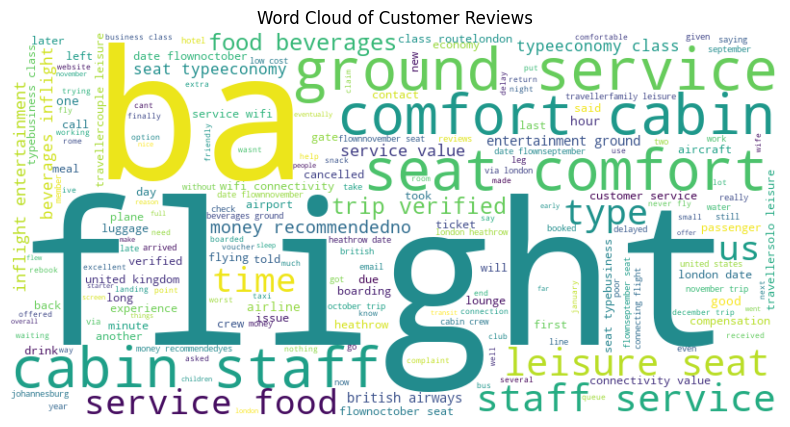

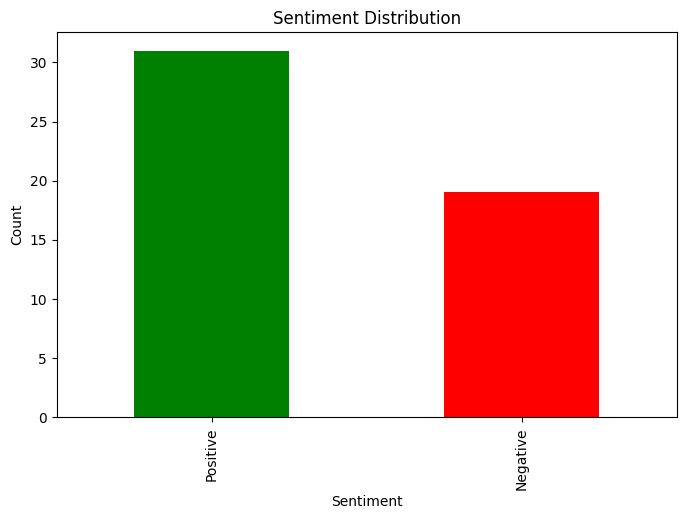

In [12]:
# Install wordcloud package
%pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word cloud
text = " ".join(df['Cleaned_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Customer Reviews")
plt.show()

# Sentiment distribution
df['Sentiment_Label'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'], figsize=(8, 5))
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
